In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
from matplotlib import cm
import gsw

In [2]:
data = xr.open_dataset('eddy_trajectory_2.0exp_19930101_20191015.nc')
new = xr.open_dataset('eddy_trajectory_dt_2.0_19930101_20200307.nc')

In [3]:
# Change longitude from [0,360] to [-180,180]
with xr.set_options(keep_attrs=True):
    data = data.assign({'longitude':(((data.longitude + 180) % 360) - 180)})
    
with xr.set_options(keep_attrs=True):
    new = new.assign({'longitude':(((new.longitude + 180) % 360) - 180)})

In [4]:
# Select data within Mengyang's regional box
BOX = [-160,-156,23.5,28.5]

# name the subset, to avoid loading the dataset everytime
data1 = data.where((data.longitude>BOX[0])&(data.longitude<BOX[1])&\
              (data.latitude>BOX[2])&(data.latitude<BOX[3]),
               drop=True)

data1_new = new.where((new.longitude>BOX[0])&(new.longitude<BOX[1])&\
              (new.latitude>BOX[2])&(new.latitude<BOX[3]),
               drop=True)

In [6]:
# set as coordinates

data2 = data1.set_coords({'time','longitude','latitude'})
data2_new = data1_new.set_coords({'time','longitude','latitude'})

In [7]:
# to get an idea what time the obs is
data2.isel(obs=22986)

<xarray.Dataset>
Dimensions:             ()
Coordinates:
    latitude            float32 27.64
    longitude           float32 -156.3
    time                datetime64[ns] 2017-06-30
Data variables:
    amplitude           float32 0.068
    cyclonic_type       float64 -1.0
    observation_flag    float64 0.0
    observation_number  float64 4.0
    speed_average       float32 0.2209
    speed_radius        float32 8.51e+04
    track               float64 3.589e+05
Attributes: (12/16)
    title:                     Mesoscale Eddy Trajectories Atlas in Altimeter...
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    comment:                   Surface product; mesoscale eddies
    standard_name_vocabulary:  NetCDF Climate and Forecast (CF) Metadata Conv...
    date_created:              2020-07-09T16:26:15Z
    time_coverage_duration:    P9784D
    ...                        ...
    creator_url:               http://www.aviso.altimetry.fr
    creator_email:             aviso@altimetry.fr
    license:                   http://www.aviso.altimetry.fr/fileadmin/docume...
    summary:                   This dataset contains mesoscale eddy trajector...
    input_product_reference:   https://www.aviso.altimetry.fr/en/data/product...
    product_version:           2.0exp

In [8]:
data2_new.isel(obs=23165)

<xarray.Dataset>
Dimensions:             ()
Coordinates:
    latitude            float32 27.64
    longitude           float32 -156.3
    time                datetime64[ns] 2017-06-30
Data variables:
    amplitude           float32 0.068
    cyclonic_type       float64 -1.0
    observation_flag    float64 0.0
    observation_number  float64 4.0
    speed_average       float32 0.2209
    speed_radius        float32 8.51e+04
    track               float64 3.616e+05
Attributes: (12/17)
    title:                     Mesoscale Eddy Trajectories Atlas in Altimeter...
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    comment:                   Surface product; mesoscale eddies
    framework_used:            https://github.com/AntSimi/py-eddy-tracker
    standard_name_vocabulary:  NetCDF Climate and Forecast (CF) Metadata Conv...
    date_created:              2020-12-15T16:25:59Z
    ...                        ...
    creator_url:               http://www.aviso.altimetry.fr
    creator_email:             aviso@altimetry.fr
    license:                   http://www.aviso.altimetry.fr/fileadmin/docume...
    summary:                   This dataset contains mesoscale eddy trajector...
    input_product_reference:   https://www.aviso.altimetry.fr/en/data/product...
    product_version:           2.0

In [9]:
# select data within +/- 15 days window centered at time[i]
i = 22986
dt = np.abs(data2.time-data2.isel(obs=i).time)   # absolute time difference
subset = data2.where(dt<=np.timedelta64(15,'D'),drop=True)

j = 23165
dt1 = np.abs(data2_new.time-data2_new.isel(obs=j).time)   # absolute time difference
subset_new = data2_new.where(dt1<=np.timedelta64(15,'D'), drop=True)

# select data within +/- 60 days windows
i = 23165
dt = np.abs(data2_new.time-data2_new.isel(obs=i).time)   # absolute time difference
subset_long = data2_new.where(dt<=np.timedelta64(60,'D'),drop=True)

In [10]:
np.unique(subset_new.track)

array([168043., 360777., 361625., 361820.])

In [11]:
np.unique(subset.track)

array([168043., 358081., 358929., 359124.])

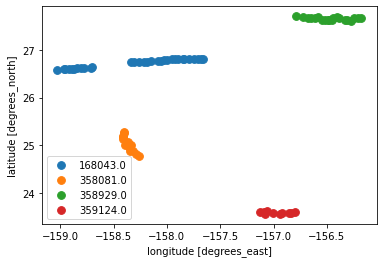

In [12]:
# old dataset, for 30 days

for track in np.unique(subset.track):
    track1 = subset.where(subset.track == track, drop=True)
    im = track1.plot.scatter(x='longitude',y='latitude', label=track,s=60)
plt.legend()
#plt.colorbar(im)

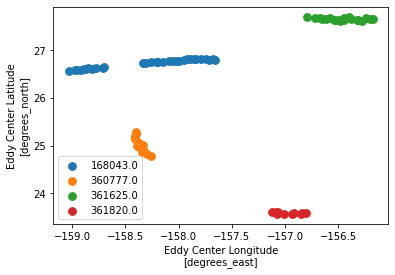

In [53]:
# new dataset for 30 days

for track in np.unique(subset_new.track):
    track1 = subset_new.where(subset_new.track == track, drop=True)
    im = track1.plot.scatter(x='longitude',y='latitude', label=track,s=60)
plt.legend()
#plt.colorbar(im)

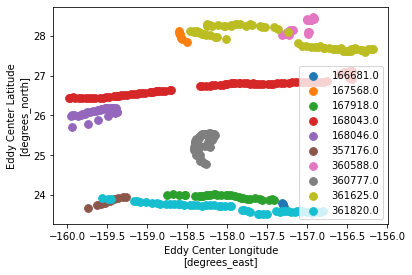

In [54]:
# 4 months of tracks, newdataset

for track in np.unique(subset_long.track):
    track1 = subset_long.where(subset_long.track == track, drop=True)
    im = track1.plot.scatter(x='longitude',y='latitude', label=track,s=60)
plt.legend()

fig = plt.gcf()
#fig.set_size_inches(dist1[0]/1e5*2, dist2[0]/1e5*2)
fig.savefig('new_4month_track.png', dpi=200)

# Track plots

## 4 months track (new dataset)

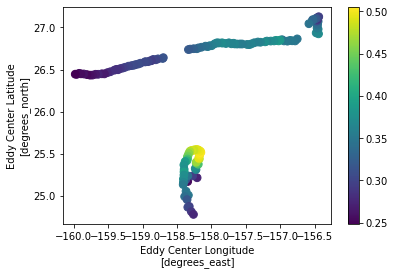

In [56]:
# track my eddies from 2017-05-01 to 2017-08-29

track1 = subset_long.where((subset_long.track == 168043)|(subset_long.track == 360777), drop=True)
im = track1.plot.scatter(x='longitude',y='latitude',c=track1.speed_average,s=60)

plt.colorbar(im)

# the whole lifetime track (new dataset)

In [81]:
# how long does these 2 eddies last?
    # anticyclone: 2017-05-04 to 2017-09-07
    # cyclone: 2017=05-12 to 2017-06-27
# when no domain limit
# using the new dataset

data_0 = new.set_coords({'time','longitude','latitude'}, inplace=None)
subset_0 = data_0.where((data_0.track == 168043)|(data_0.track == 360777), drop=True)
anti = subset_0.where(subset_0.track == 168043, drop=True)
cyc = subset_0.where(subset_0.track == 360777, drop=True)

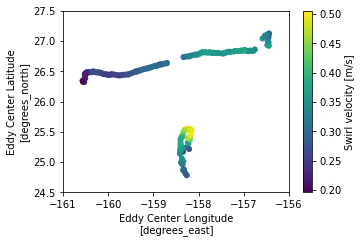

In [151]:
im = subset_0.plot.scatter(x='longitude',y='latitude',c=subset_0.speed_average,s=25)
cb = plt.colorbar(im)

#font_size = 20
cb.set_label('Swirl velocity [m/s]')
#cb.ax.tick_params(labelsize=font_size)

#plt.legend()
#plt.xlabel('Eddy Center Langitude [degrees_east]',size=font_size)
#plt.xticks(size=font_size)

axes = plt.gca()
axes.set_xlim([-161,-156])
axes.set_ylim([24.5,27.5])

fig = plt.gcf()

dist1 = gsw.distance([-161,-156],[24.5,24.5])
dist2 = gsw.distance([-156,-156],[24.5,27.5])

fig.set_size_inches(dist1[0]/1e5,dist2[0]/1e5)
fig.savefig('wholelife_track.png', dpi=150, bbox_inches="tight")

# to avoid text cutoff when export png

## 30 days track (new dataset)

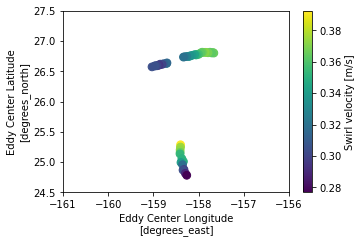

In [160]:
# track my eddies from 2017-06-15 to 2017-07-15

track1 = subset_new.where((subset_new.track == 168043)|(subset_new.track == 360777), drop=True)
im = track1.plot.scatter(x='longitude',y='latitude',c=track1.speed_average,s=60)

cb = plt.colorbar(im)
cb.set_label('Swirl velocity [m/s]')

axes = plt.gca()
axes.set_xlim([-161,-156])
axes.set_ylim([24.5,27.5])

dist1 = gsw.distance([-161,-156],[24.5,24.5])
dist2 = gsw.distance([-156,-156],[24.5,27.5])

fig = plt.gcf()
fig.set_size_inches(dist1[0]/1e5,dist2[0]/1e5)
fig.savefig('30days_track.png', dpi=150, bbox_inches="tight")

# nonlinearity for the whole lifetime

In [155]:
# calculate eddy nonlinearity of their whole lifetime
# new dataset

# anticyclone
track1 = subset_0.where(subset_0.track == 168043, drop=True)
ds = gsw.distance(lon=track1.longitude.values,lat=track1.latitude.values)
dt = np.diff(track1.time)
dt = dt.astype('float64')/1e9
c_1 = ds/dt
display('Anticyclone: mean propagation speed',c_1.mean())
display('mean nonlinearity',(track1.speed_average.mean()/c_1.mean()).values)

# cyclone
track1 = subset_0.where(subset_0.track == 360777, drop=True)
ds = gsw.distance(lon=track1.longitude.values,lat=track1.latitude.values)
dt = np.diff(track1.time)
dt = dt.astype('float64')/1e9
c_0 = ds/dt
display('Cyclone: mean propagation speed',c_0.mean())
display('mean nonlinearity',(track1.speed_average.mean()/c_0.mean()).values)


'Anticyclone: mean propagation speed'

0.044958793997834666

'mean nonlinearity'

array(6.87903713)

'Cyclone: mean propagation speed'

0.05020731377716802

'mean nonlinearity'

array(8.13376375)

In [158]:
# calculate eddy nonlinearity during the time 30 days away from 2017-06-30
# new dataset

# anticyclone
track1 = subset_new.where(subset_new.track == 168043, drop=True)
ds = gsw.distance(lon=track1.longitude.values,lat=track1.latitude.values)
dt = np.diff(track1.time)
dt = dt.astype('float64')/1e9
c_1 = ds/dt
display(c_1.mean()) # swirl velocity
display(track1.speed_average.mean().values) # propagation speed
display((track1.speed_average.mean()/c_1.mean()).values) # nonlinearity
 
# cyclone
track1 = subset_new.where(subset_new.track == 360777, drop=True)
ds = gsw.distance(lon=track1.longitude.values,lat=track1.latitude.values)
dt = np.diff(track1.time)
dt = dt.astype('float64')/1e9
c_0 = ds/dt
display(c_0.mean())
display(track1.speed_average.mean().values)
display((track1.speed_average.mean()/c_0.mean()).values)

0.055553704014530886

array(0.33579674, dtype=float32)

array(6.04454284)

0.06599064744549034

array(0.33758456, dtype=float32)

array(5.11564242)

In [185]:
anti.sel(obs=61)

<xarray.Dataset>
Dimensions:             ()
Coordinates:
    latitude            float32 26.74
    longitude           float32 -158.3
    time                datetime64[ns] 2017-07-04
Data variables:
    amplitude           float32 0.114
    cyclonic_type       float64 1.0
    observation_flag    float64 0.0
    observation_number  float64 61.0
    speed_average       float32 0.3198
    speed_radius        float32 1.178e+05
    track               float64 1.68e+05
Attributes:
    title:                     Mesoscale Eddy Trajectories Atlas in Altimeter...
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    comment:                   Surface product; mesoscale eddies
    framework_used:            https://github.com/AntSimi/py-eddy-tracker
    standard_name_vocabulary:  NetCDF Climate and Forecast (CF) Metadata Conv...
    date_created:              2020-12-15T16:25:59Z
    time_coverage_duration:    P9928D
    time_coverage_start:       1993-01-01T00:00:00Z
    time_coverage_end:         2020-03-07T00:00:00Z
    institution:               CNES/CLS in collaboration with Oregon State Un...
    project:                   SSALTO/DUACS
    creator_url:               http://www.aviso.altimetry.fr
    creator_email:             aviso@altimetry.fr
    license:                   http://www.aviso.altimetry.fr/fileadmin/docume...
    summary:                   This dataset contains mesoscale eddy trajector...
    input_product_reference:   https://www.aviso.altimetry.fr/en/data/product...
    product_version:           2.0

In [186]:
# the jump happened in 2017-07-04 to 2017-07-05
anti.sel(obs=61).longitude.values - anti.sel(obs=62).longitude.values

0.3739624

In [178]:
anti.sel(obs=60).longitude.values - anti.sel(obs=61).longitude.values

0.027038574

In [179]:
anti.sel(obs=62).longitude.values - anti.sel(obs=63).longitude.values

-0.008972168

In [83]:
# calculate nonlinearity of the cyclone and anticyclone
# track number for the cyclone in the old file is: 358081, in the new one is: 360777
# track number for the anticyclone is the same: 168043
# they show the same calculation result!

track1 = subset.where(subset.track == 168043, drop=True)
track1_new = subset_new.where(subset_new.track == 168043, drop=True)

ds = gsw.distance(lon=track1.longitude.values,lat=track1.latitude.values)
dt = np.diff(track1.time)
dt = dt.astype('float64')/1e9
c = ds/dt
display(c.mean())

ds_new = gsw.distance(lon=track1_new.longitude.values,lat=track1_new.latitude.values)
dt_new = np.diff(track1_new.time)
dt_new = dt_new.astype('float64')/1e9
c_new = ds_new/dt_new
display(c_new.mean())

0.050671262529161244

0.050671262529161244